*Imports*

In [1]:
import pandas as pd


import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

Load Data

In [2]:
#%% Load NYC Case Data
data_dir = '../../covid-19-nyc-data/'
def read_and_date(path):
    df = pd.read_csv(path)
    df['datetime'] = pd.to_datetime(df['timestamp'])
    return df

age_df = read_and_date(data_dir + 'age.csv')
bed_df = read_and_date(data_dir + 'beds.csv')
zc_tests_df = read_and_date(data_dir + 'zcta.csv')
tot_df = read_and_date(data_dir + 'nyc.csv')
hosp_df = read_and_date(data_dir + 'hospitalized.csv')
gender_df = read_and_date(data_dir + 'gender.csv')
borough_df = read_and_date(data_dir + 'borough.csv')
state_df = read_and_date(data_dir + 'state.csv')

#%% Load SVI Data
data_dir = '../raw_data/'
#SVI Index attributes
census_df = pd.read_csv(data_dir + 'svi_index_NewYork.csv')
#filter out NYC
census_df = census_df[census_df['COUNTY'].isin(['Kings','Queens','Bronx','New York','Richmond'])] 


#%% Load NTA-CTA-ZCTA-ZC Relationships
data_dir = '../raw_data/'

ct_to_zcta_df = pd.read_csv(data_dir + 'zcta_tract_rel_10.csv')
#Select NYC counties
ct_to_zcta_df = ct_to_zcta_df[(ct_to_zcta_df['STATE'] == 36) & ct_to_zcta_df['COUNTY'].isin([5,81,61,85,47])]


# Merge zcta_tests to census data to nta and zcta and census_tracts
# Create a backbone, merge the ct/zcta/nta

ct_to_zcta_df.rename(columns={'ZCTA5':'zcta'}, inplace=True)
ct_to_zcta_df.rename(columns={'TRACT':'census_tract'}, inplace=True)


master_df = census_df.merge(ct_to_zcta_df, left_on = 'FIPS', right_on = 'GEOID')


#Aggregate the Census Tract data by ZCTA and then join columns as needed
census_zc_subset = master_df[['zcta', 'POPPT']].groupby('zcta').agg('sum')
zcta_tests_df = zc_tests_df.merge(census_zc_subset, on = 'zcta', how = 'left')
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000] #filter out NaN data

In [22]:
zcta_tests_df['percent_positive'] = zcta_tests_df['positive']/zcta_tests_df['total']*100
zcta_tests_df['percent_tested'] = zcta_tests_df['total']/zcta_tests_df['POPPT']*100

zcta_tests_df['new_positive'] = zcta_tests_df.groupby('zcta')['positive'].diff()
zcta_tests_df['new_test'] = zcta_tests_df.groupby('zcta')['total'].diff()

zcta_tests_df['percent_new_positive'] = zcta_tests_df['new_positive']/zcta_tests_df['new_test']*100
zcta_tests_df['percent_new_tested'] = zcta_tests_df['new_test']/zcta_tests_df['POPPT']*100



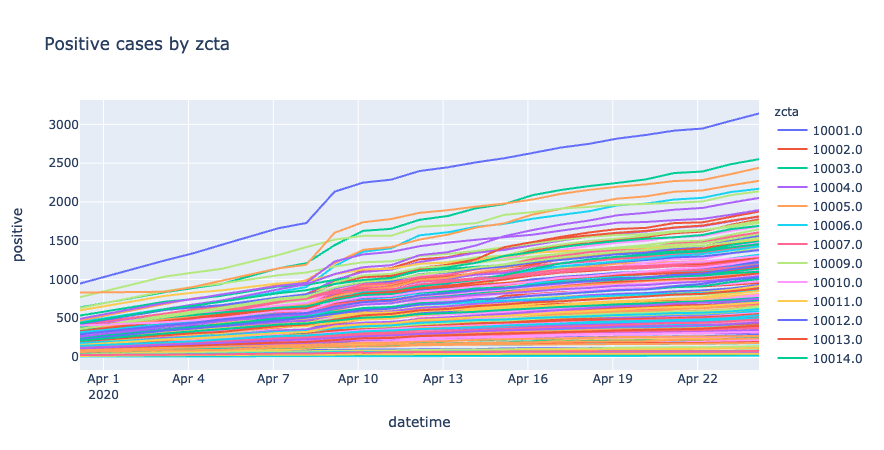

In [8]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="positive", color= "zcta", title='Positive cases by zcta')
fig.show()

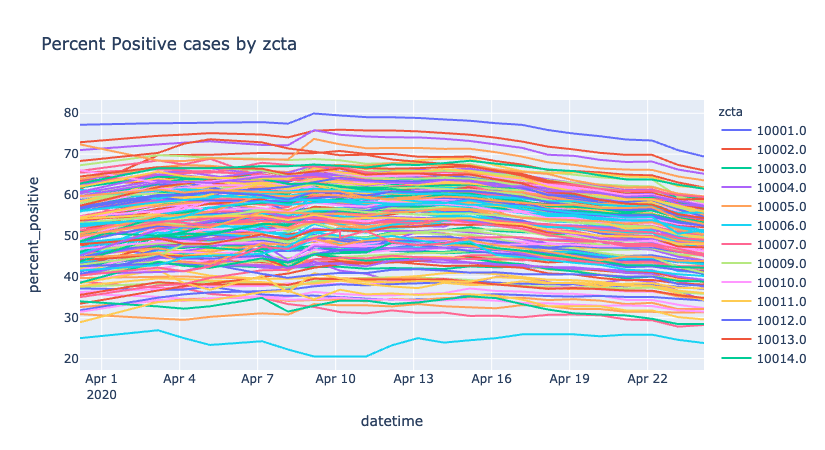

In [10]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="percent_positive", color= "zcta", title='Percent Positive cases by zcta')
fig.show()

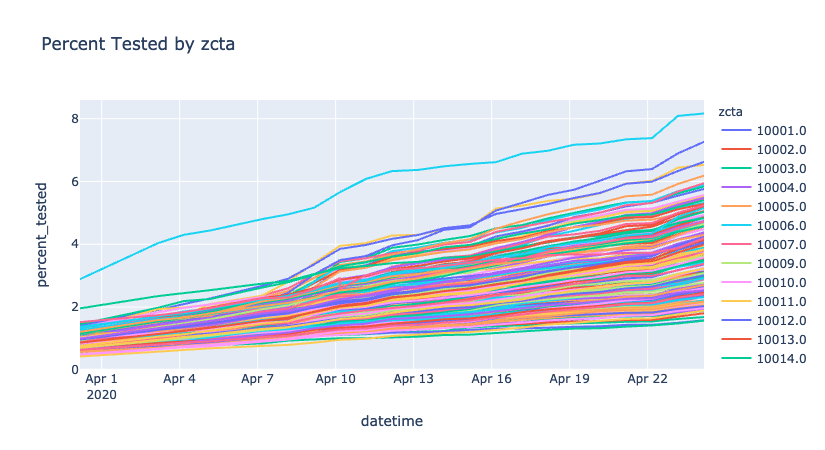

In [11]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="percent_tested", color= "zcta", title='Percent Tested by zcta')
fig.show()

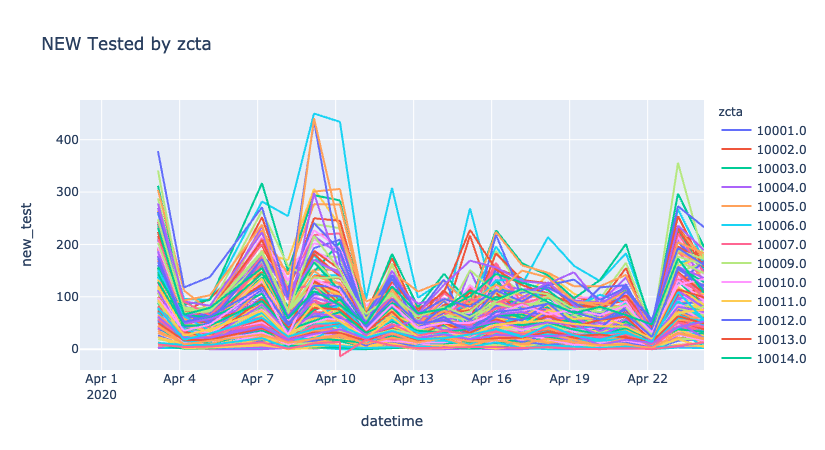

In [27]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="new_test", color= "zcta", title='NEW Tested by zcta')
fig.show()

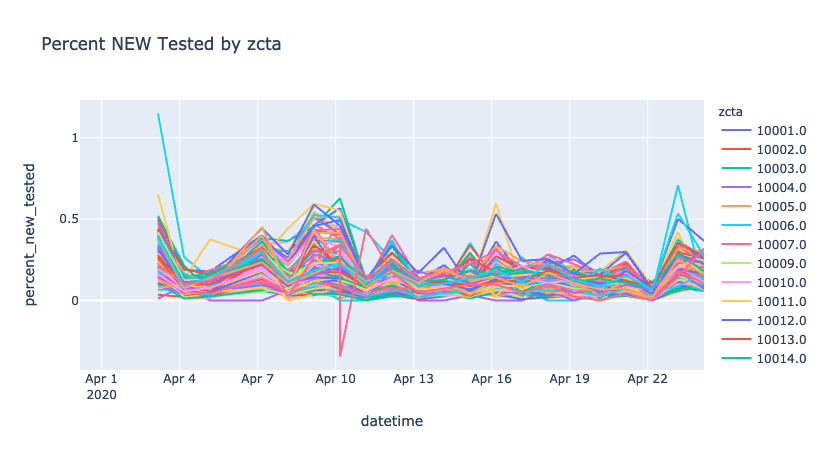

In [23]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="percent_new_tested", color= "zcta", title='Percent NEW Tested by zcta')
fig.show()

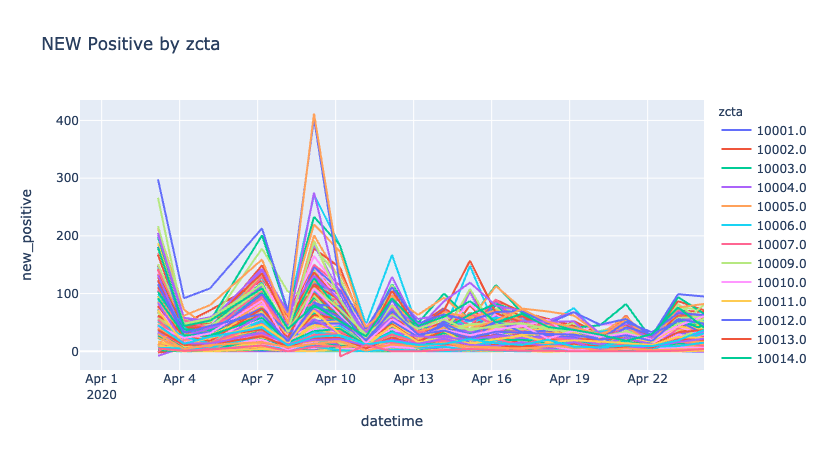

In [28]:
#%% PLOT graph of zcta
zcta_tests_df = zcta_tests_df[zcta_tests_df['zcta'] < 12000]
fig = px.line(zcta_tests_df, x="datetime", y="new_positive", color= "zcta", title='NEW Positive by zcta')
fig.show()

In [18]:
zcta_tests_df['new_positive'] = zcta_tests_df.groupby('zcta')['positive'].diff()

In [21]:
What is the daily percent increase
cf 
new_positives / (old positives in the last two weeks)

timestamp     zcta  positive  total  \
1     2020-03-31T04:00:00Z  10001.0       113    265   
179   2020-04-03T04:00:00Z  10001.0       136    304   
357   2020-04-04T04:00:00Z  10001.0       146    321   
535   2020-04-05T04:00:00Z  10001.0       158    337   
713   2020-04-07T04:00:00Z  10001.0       170    364   
892   2020-04-08T04:00:00Z  10001.0       178    384   
1071  2020-04-09T04:00:00Z  10001.0       191    408   
1249  2020-04-10T04:00:00Z  10001.0       197    429   
1428  2020-04-11T04:00:00Z  10001.0       201    435   
1606  2020-04-12T04:00:00Z  10001.0       211    448   
1784  2020-04-13T04:00:00Z  10001.0       221    462   
1962  2020-04-14T04:00:00Z  10001.0       231    480   
2140  2020-04-15T04:00:00Z  10001.0       238    502   
2318  2020-04-16T04:00:00Z  10001.0       242    521   
2496  2020-04-17T04:00:00Z  10001.0       251    545   
2674  2020-04-18T04:00:00Z  10001.0       254    563   
2852  2020-04-19T04:00:00Z  10001.0       260    571   
3030  2020-04-20T04:00:00Z  10001.0       261    582   
3208  2020-04-21T04:00:00Z  10001.0       266    600   
3386  2020-04-22T04:00:00Z  10001.0       268    603   
3564  2020-04-23T04:00:00Z  10001.0       277    636   
3742  2020-04-24T04:00:00Z  10001.0       285    661   

                      datetime    POPPT  percent_positive  percent_tested  \
1    2020-03-31 04:00:00+00:00  21102.0         42.641509        1.255805   
179  2020-04-03 04:00:00+00:00  21102.0         44.736842        1.440622   
357  2020-04-04 04:00:00+00:00  21102.0         45.482866        1.521183   
535  2020-04-05 04:00:00+00:00  21102.0         46.884273        1.597005   
713  2020-04-07 04:00:00+00:00  21102.0         46.703297        1.724955   
892  2020-04-08 04:00:00+00:00  21102.0         46.354167        1.819733   
1071 2020-04-09 04:00:00+00:00  21102.0         46.813725        1.933466   
1249 2020-04-10 04:00:00+00:00  21102.0         45.920746        2.032983   
1428 2020-04-11 04:00:00+00:00  21102.0         46.206897        2.061416   
1606 2020-04-12 04:00:00+00:00  21102.0         47.098214        2.123022   
1784 2020-04-13 04:00:00+00:00  21102.0         47.835498        2.189366   
1962 2020-04-14 04:00:00+00:00  21102.0         48.125000        2.274666   
2140 2020-04-15 04:00:00+00:00  21102.0         47.410359        2.378921   
2318 2020-04-16 04:00:00+00:00  21102.0         46.449136        2.468960   
2496 2020-04-17 04:00:00+00:00  21102.0         46.055046        2.582694   
2674 2020-04-18 04:00:00+00:00  21102.0         45.115453        2.667994   
2852 2020-04-19 04:00:00+00:00  21102.0         45.534151        2.705905   
3030 2020-04-20 04:00:00+00:00  21102.0         44.845361        2.758032   
3208 2020-04-21 04:00:00+00:00  21102.0         44.333333        2.843332   
3386 2020-04-22 04:00:00+00:00  21102.0         44.444444        2.857549   
3564 2020-04-23 04:00:00+00:00  21102.0         43.553459        3.013932   
3742 2020-04-24 04:00:00+00:00  21102.0         43.116490        3.132405   

      new_positive  new_test  percent_new_positive  percent_new_tested  
1              NaN       NaN                   NaN                 NaN  
179           23.0     242.0             45.867769            1.146811  
357           10.0     250.0             46.400000            1.184722  
535           12.0     262.0             48.473282            1.241588  
713           12.0     284.0             47.887324            1.345844  
892            8.0     291.0             46.048110            1.379016  
1071          13.0     314.0             46.815287            1.488011  
1249           6.0     324.0             44.753086            1.535399  
1428           4.0     330.0             45.151515            1.563833  
1606          10.0     325.0             45.538462            1.540138  
1784          10.0     332.0             47.590361            1.573311  
1962          10.0     348.0             48.275862            1.649133  
2140   